In [1]:
import xarray as xr
from model import rapid_mcdr_model
from matplotlib import pyplot as plt
import numpy as np

In [2]:
path_to_data='/Users/ksuselj/Desktop/Projects/ecco-darwin-analysis/analysis/gcm_notebooks_1deg/rapid_mcdr_rt/'
exp_names=['NAS','WBC','EBC','EU','ACC']

exp_type='_pco2' # for HorAdv averaging, see manuscript
exp_type='' # for Deploy averaging

In [3]:
def cumulative_mean(dta):
    # dta is DataArray
    return dta.cumsum('time')/np.arange(1,len(dta)+1)

In [4]:
out={}
out_monthly={}
for en in exp_names:
    data=xr.load_dataset(path_to_data+en+'/model_forcing_data_daily'+exp_type+'.nc')
    out[en]=rapid_mcdr_model(data)
   # compute efficiency, that is the right way to do for continious experiments,  
    out[en]['X']=-out[en]['f_co2']/out[en]['alk_forcing']*out[en]['area']/cumulative_mean(out[en]['cdr_potential'])

    # average data on monthly time scale
    out_monthly[en]=out[en].resample(time='1MS').mean()

## OAE attributed surface CO2 flux

Text(0.5, 1.0, 'monthly $CO_2$ flux')

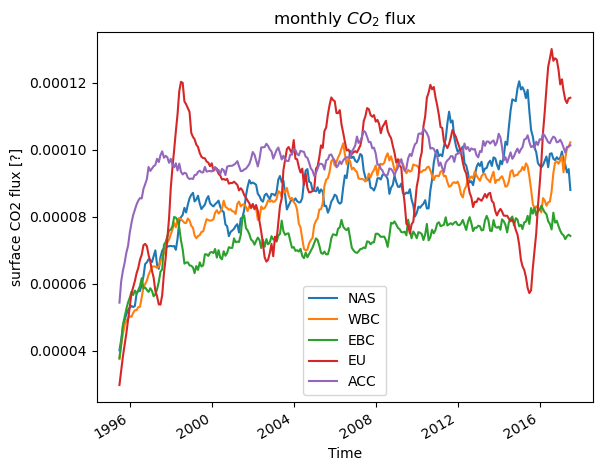

In [9]:
fig,ax = plt.subplots(1,1)
for en in exp_names:
    # monthly values, running mean over 12 months
    out_monthly[en]['f_co2'].rolling(time=12,center=True).mean().plot(label=en,ax=ax)
ax.legend()
ax.set_title('monthly $CO_2$ flux')
    


## mCDR efficiency

Text(0.5, 1.0, 'monthly $CO_2$ flux')

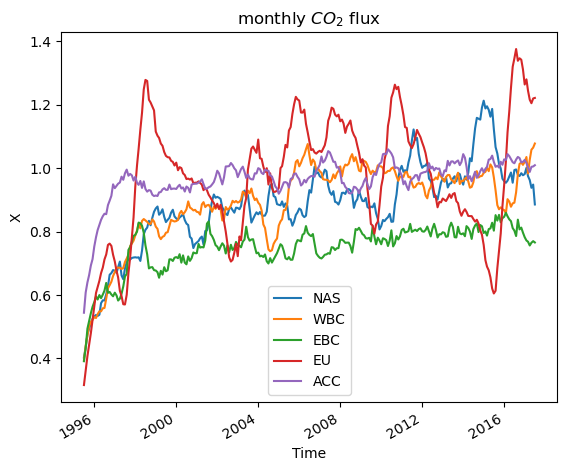

In [8]:
fig,ax = plt.subplots(1,1)
for en in exp_names:
    # monthly values, running mean over 12 months
    out_monthly[en]['X'].rolling(time=12,center=True).mean().plot(label=en,ax=ax)
ax.legend()
ax.set_title('CDR efficiency')
    